In [2]:
from lib.variational_autoencoder import variational_autoencoder as vae
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import torch as T
import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:

data = pd.read_csv('data/USCensus1990_1.csv')

data = data.drop('caseid',axis=1)


In [4]:
data.to_csv('data_50.csv',index=False)


In [5]:

numerical_features = data.select_dtypes(include=['float64', 'int64'])


In [6]:
from sklearn.mixture import GaussianMixture

# Fit a Gaussian mixture model to the numerical features
gmm = GaussianMixture(n_components=20,covariance_type='full',reg_covar=0.00001) # Change the number of components as needed
gmm.fit(numerical_features)
# 14 minutes


GaussianMixture(n_components=20, reg_covar=1e-05)

In [7]:
synthetic_numerical_data = gmm.sample(n_samples=1229143)

In [8]:
synthetic_data = np.hstack([synthetic_numerical_data[0]])
synthetic_data = pd.DataFrame(synthetic_data, columns=data.columns)
synthetic_data = synthetic_data.round()
synthetic_data = np.maximum(synthetic_data,0)
synthetic_data.to_csv('synthetic_data.csv',index=False)


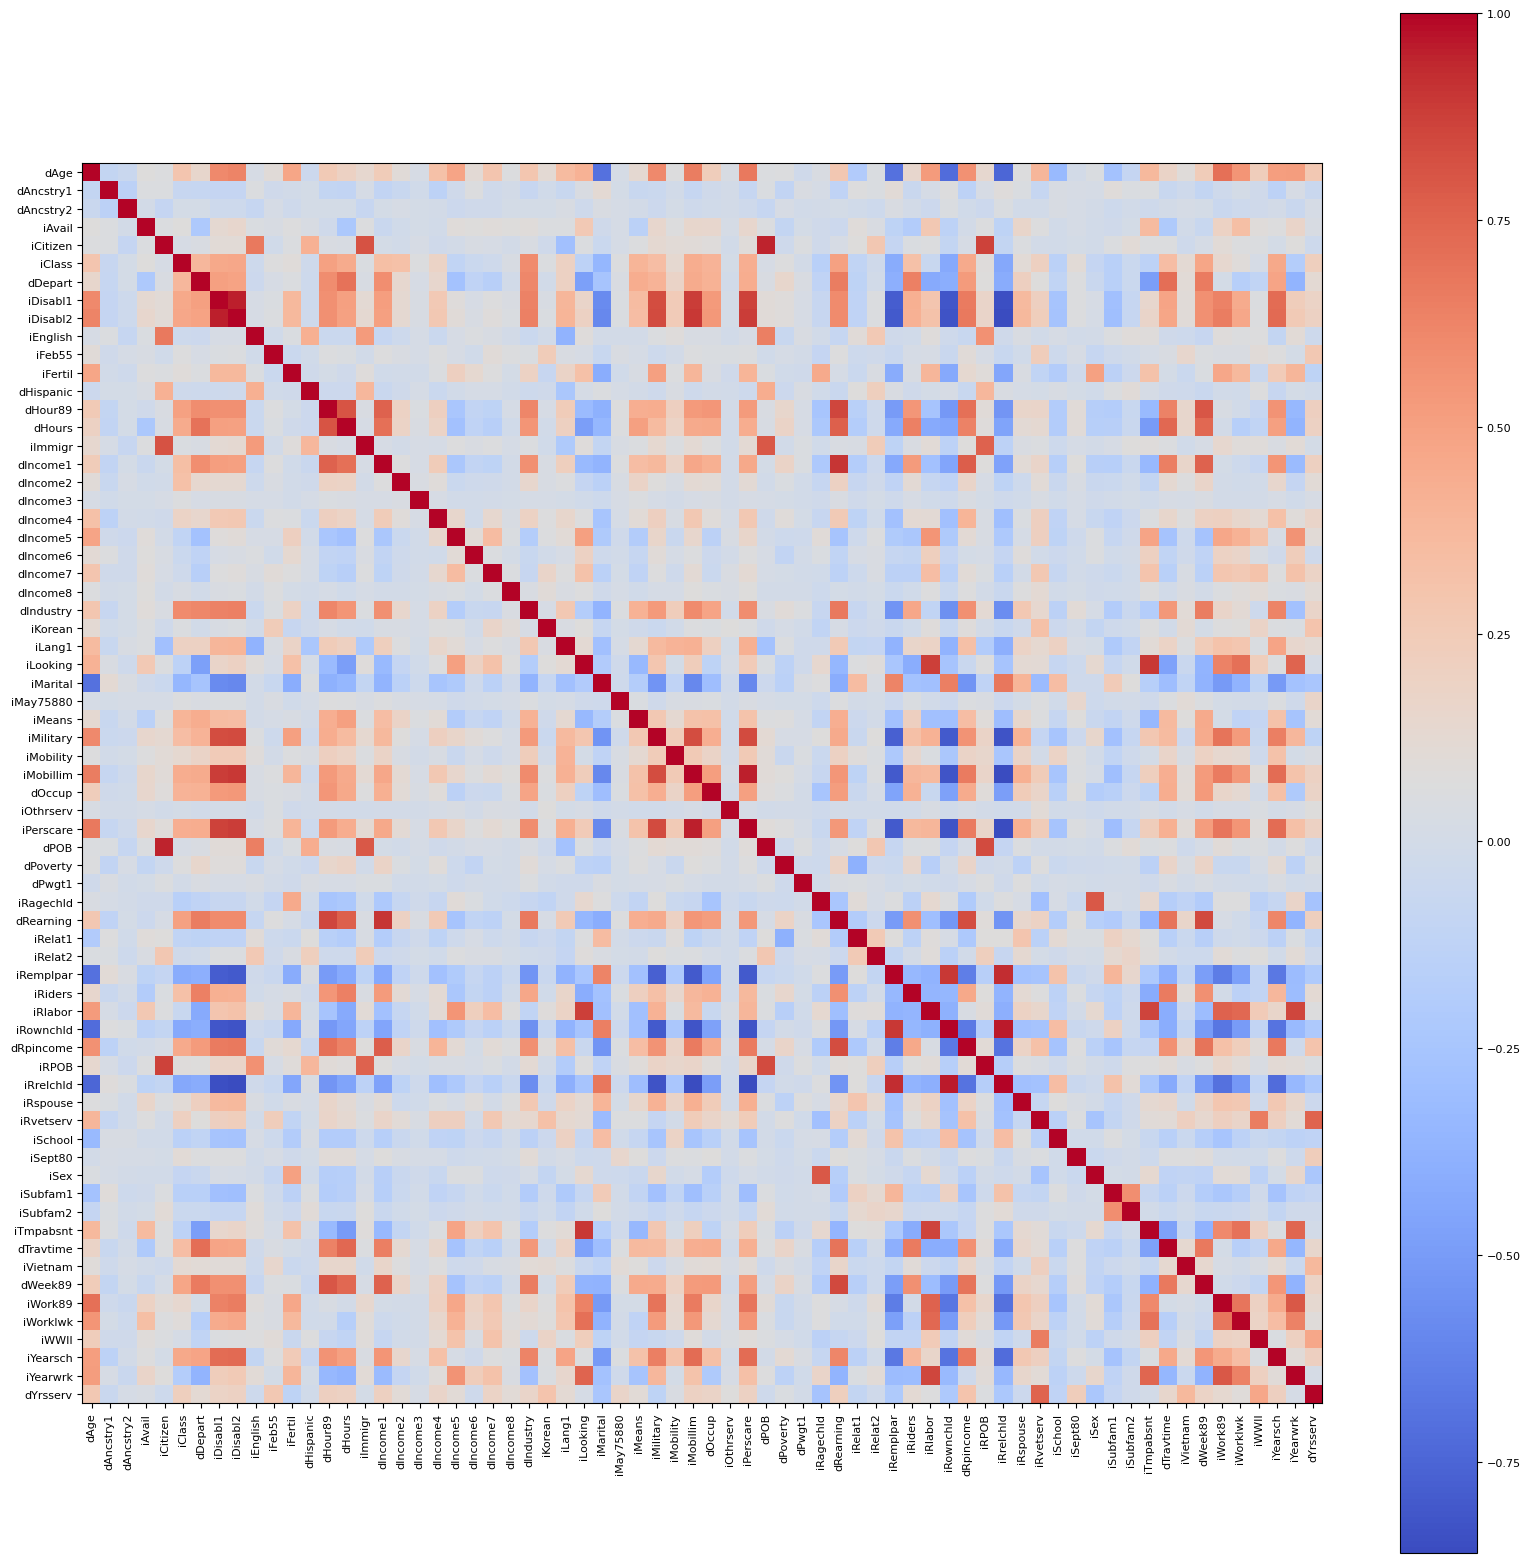

In [9]:
corr_matrix = synthetic_data.corr()

# set figure size and font size
plt.figure(figsize=(20, 20))
plt.rcParams.update({'font.size': 8})

# plot the correlation matrix using a heatmap
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# show the plot
plt.show()


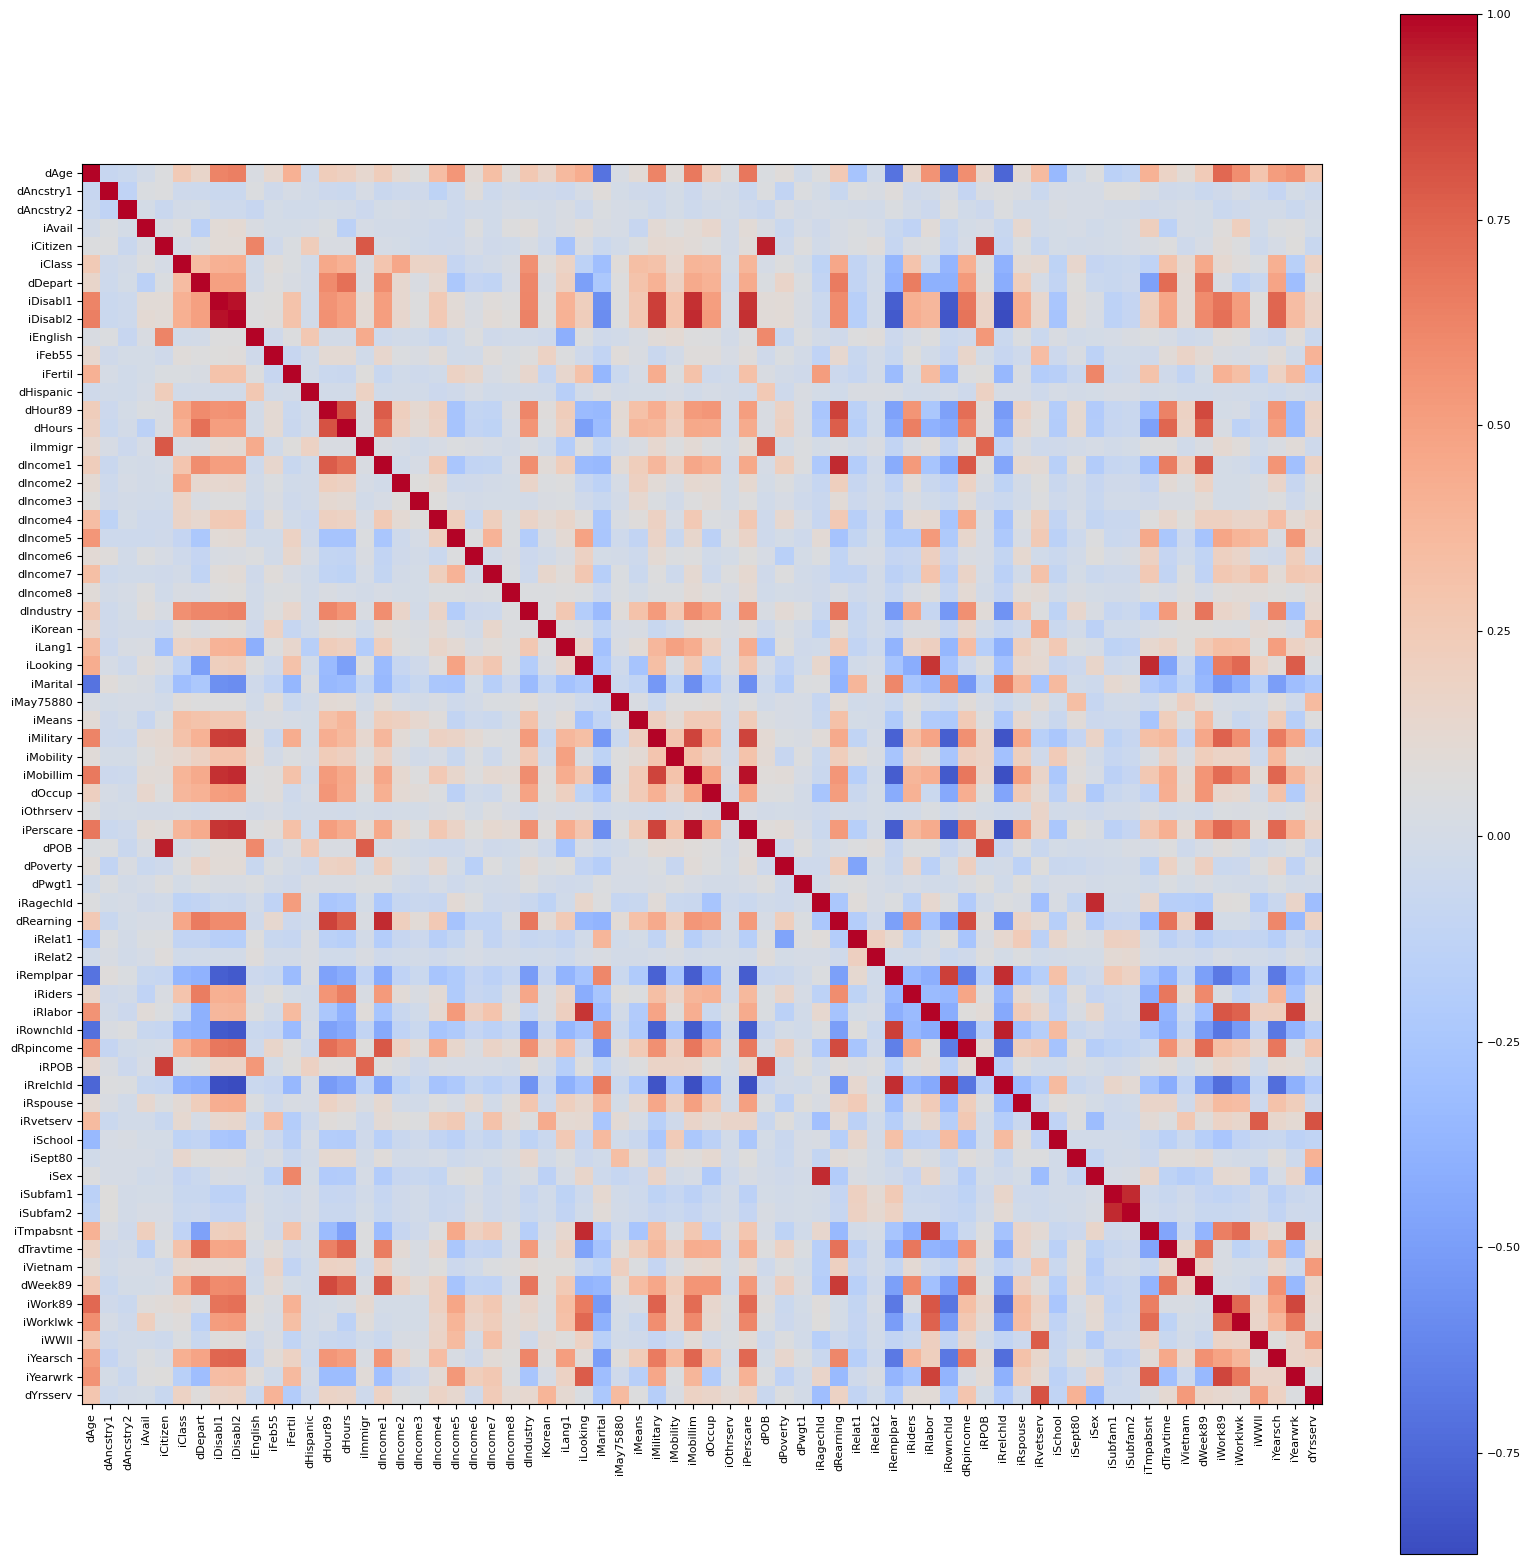

In [10]:
corr_matrix_3 = data.corr()

# set figure size and font size
plt.figure(figsize=(20, 20))
plt.rcParams.update({'font.size': 8})

# plot the correlation matrix using a heatmap
plt.imshow(corr_matrix_3, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix_3.columns)), corr_matrix_3.columns, rotation=90)
plt.yticks(range(len(corr_matrix_3.columns)), corr_matrix_3.columns)

# show the plot
plt.show()

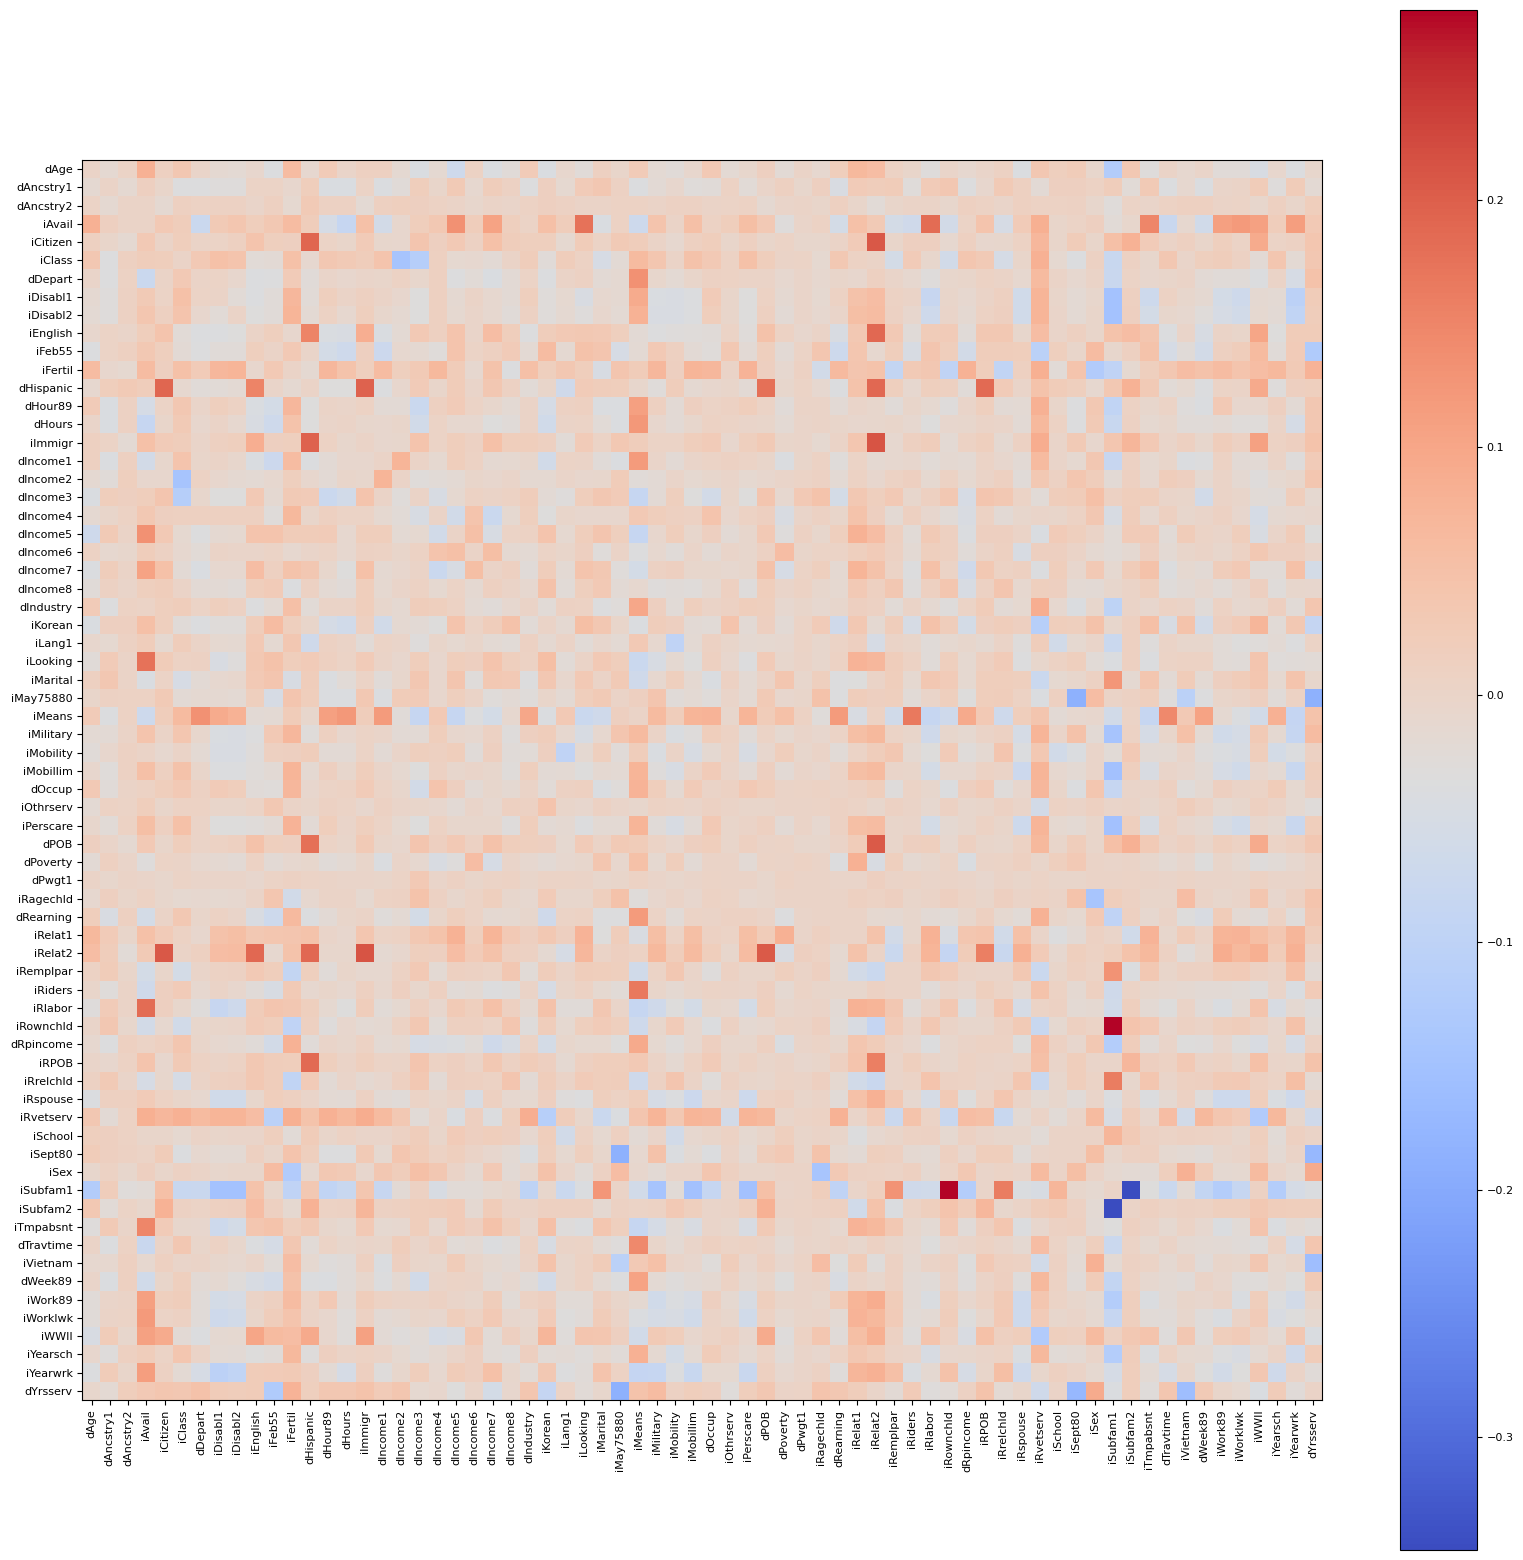

In [11]:
diff_corr = corr_matrix-corr_matrix_3
plt.figure(figsize=(20, 20))
plt.rcParams.update({'font.size': 8})

# plot the correlation matrix using a heatmap
plt.imshow(diff_corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(diff_corr.columns)), diff_corr.columns, rotation=90)
plt.yticks(range(len(diff_corr.columns)), diff_corr.columns)

# show the plot
plt.show()

In [12]:
diff_df = synthetic_data.subtract(data).abs()
max_diff = diff_df.max()
print(diff_df)
max_diff.to_csv('max_diff.csv',index=False)

         dAge  dAncstry1  dAncstry2  iAvail  iCitizen  iClass  dDepart  \
0         1.0        1.0        1.0     0.0       3.0     0.0      0.0   
1         0.0        8.0        4.0     0.0       1.0     5.0      4.0   
2         5.0       11.0        1.0     0.0       2.0     8.0      4.0   
3         1.0        9.0        5.0     0.0       1.0     6.0      2.0   
4         2.0        2.0        5.0     0.0       4.0     1.0      5.0   
...       ...        ...        ...     ...       ...     ...      ...   
1229138   1.0        9.0        9.0     0.0       0.0     2.0      3.0   
1229139   5.0        9.0        1.0     0.0       0.0     4.0      3.0   
1229140   1.0       10.0        1.0     0.0       0.0     2.0      1.0   
1229141   0.0        2.0        0.0     0.0       2.0     1.0      2.0   
1229142   NaN        NaN        NaN     NaN       NaN     NaN      NaN   

         iDisabl1  iDisabl2  iEnglish  ...  iTmpabsnt  dTravtime  iVietnam  \
0             0.0       0.0      

In [ ]:
poverty_rate